# k-NN 실습


1.   데이터 불러오기
2.   데이터 탐색
3.   2개의 변수를 이용하여 kNN 적용해보기
4.   모든 변수 이용
5.   Image 데이터에 적용해보기

---


In [1]:
# !pip install numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 불러오기

In [3]:
# https://www.kaggle.com/andrewmvd/fetal-health-classification
!gdown --id 1kdisFzBgjVbrzQ1NwNbaPAXvQX3O2hvF --output fetal_health.zip
!unzip fetal_health.zip
df = pd.read_csv('./fetal_health.csv')
description = pd.read_csv('./fetal_health_description.txt', sep='\t', header=None)

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kdisFzBgjVbrzQ1NwNbaPAXvQX3O2hvF
To: /content/fetal_health.zip
100% 47.5k/47.5k [00:00<00:00, 62.7MB/s]
Archive:  fetal_health.zip
  inflating: fetal_health.csv        
  inflating: fetal_health_description.txt  


## 데이터 탐색

In [4]:
# 데이터 확인
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [5]:
# 데이터 설명
description

,0,1
0,baseline value,Baseline Fetal Heart Rate (FHR)
1,accelerations,Number of accelerations per second
2,fetal_movement,Number of fetal movements per second
3,uterine_contractions,Number of uterine contractions per second
4,light_decelerations,Number of LDs per second
5,severe_decelerations,Number of SDs per second
6,prolongued_decelerations,Number of PDs per second
7,abnormal_short_term_variability,Percentage of time with abnormal short term va...
8,mean_value_of_short_term_variability,Mean value of short term variability
9,percentage_of_time_with_abnormal_long_term_var...,Percentage of time with abnormal long term var...


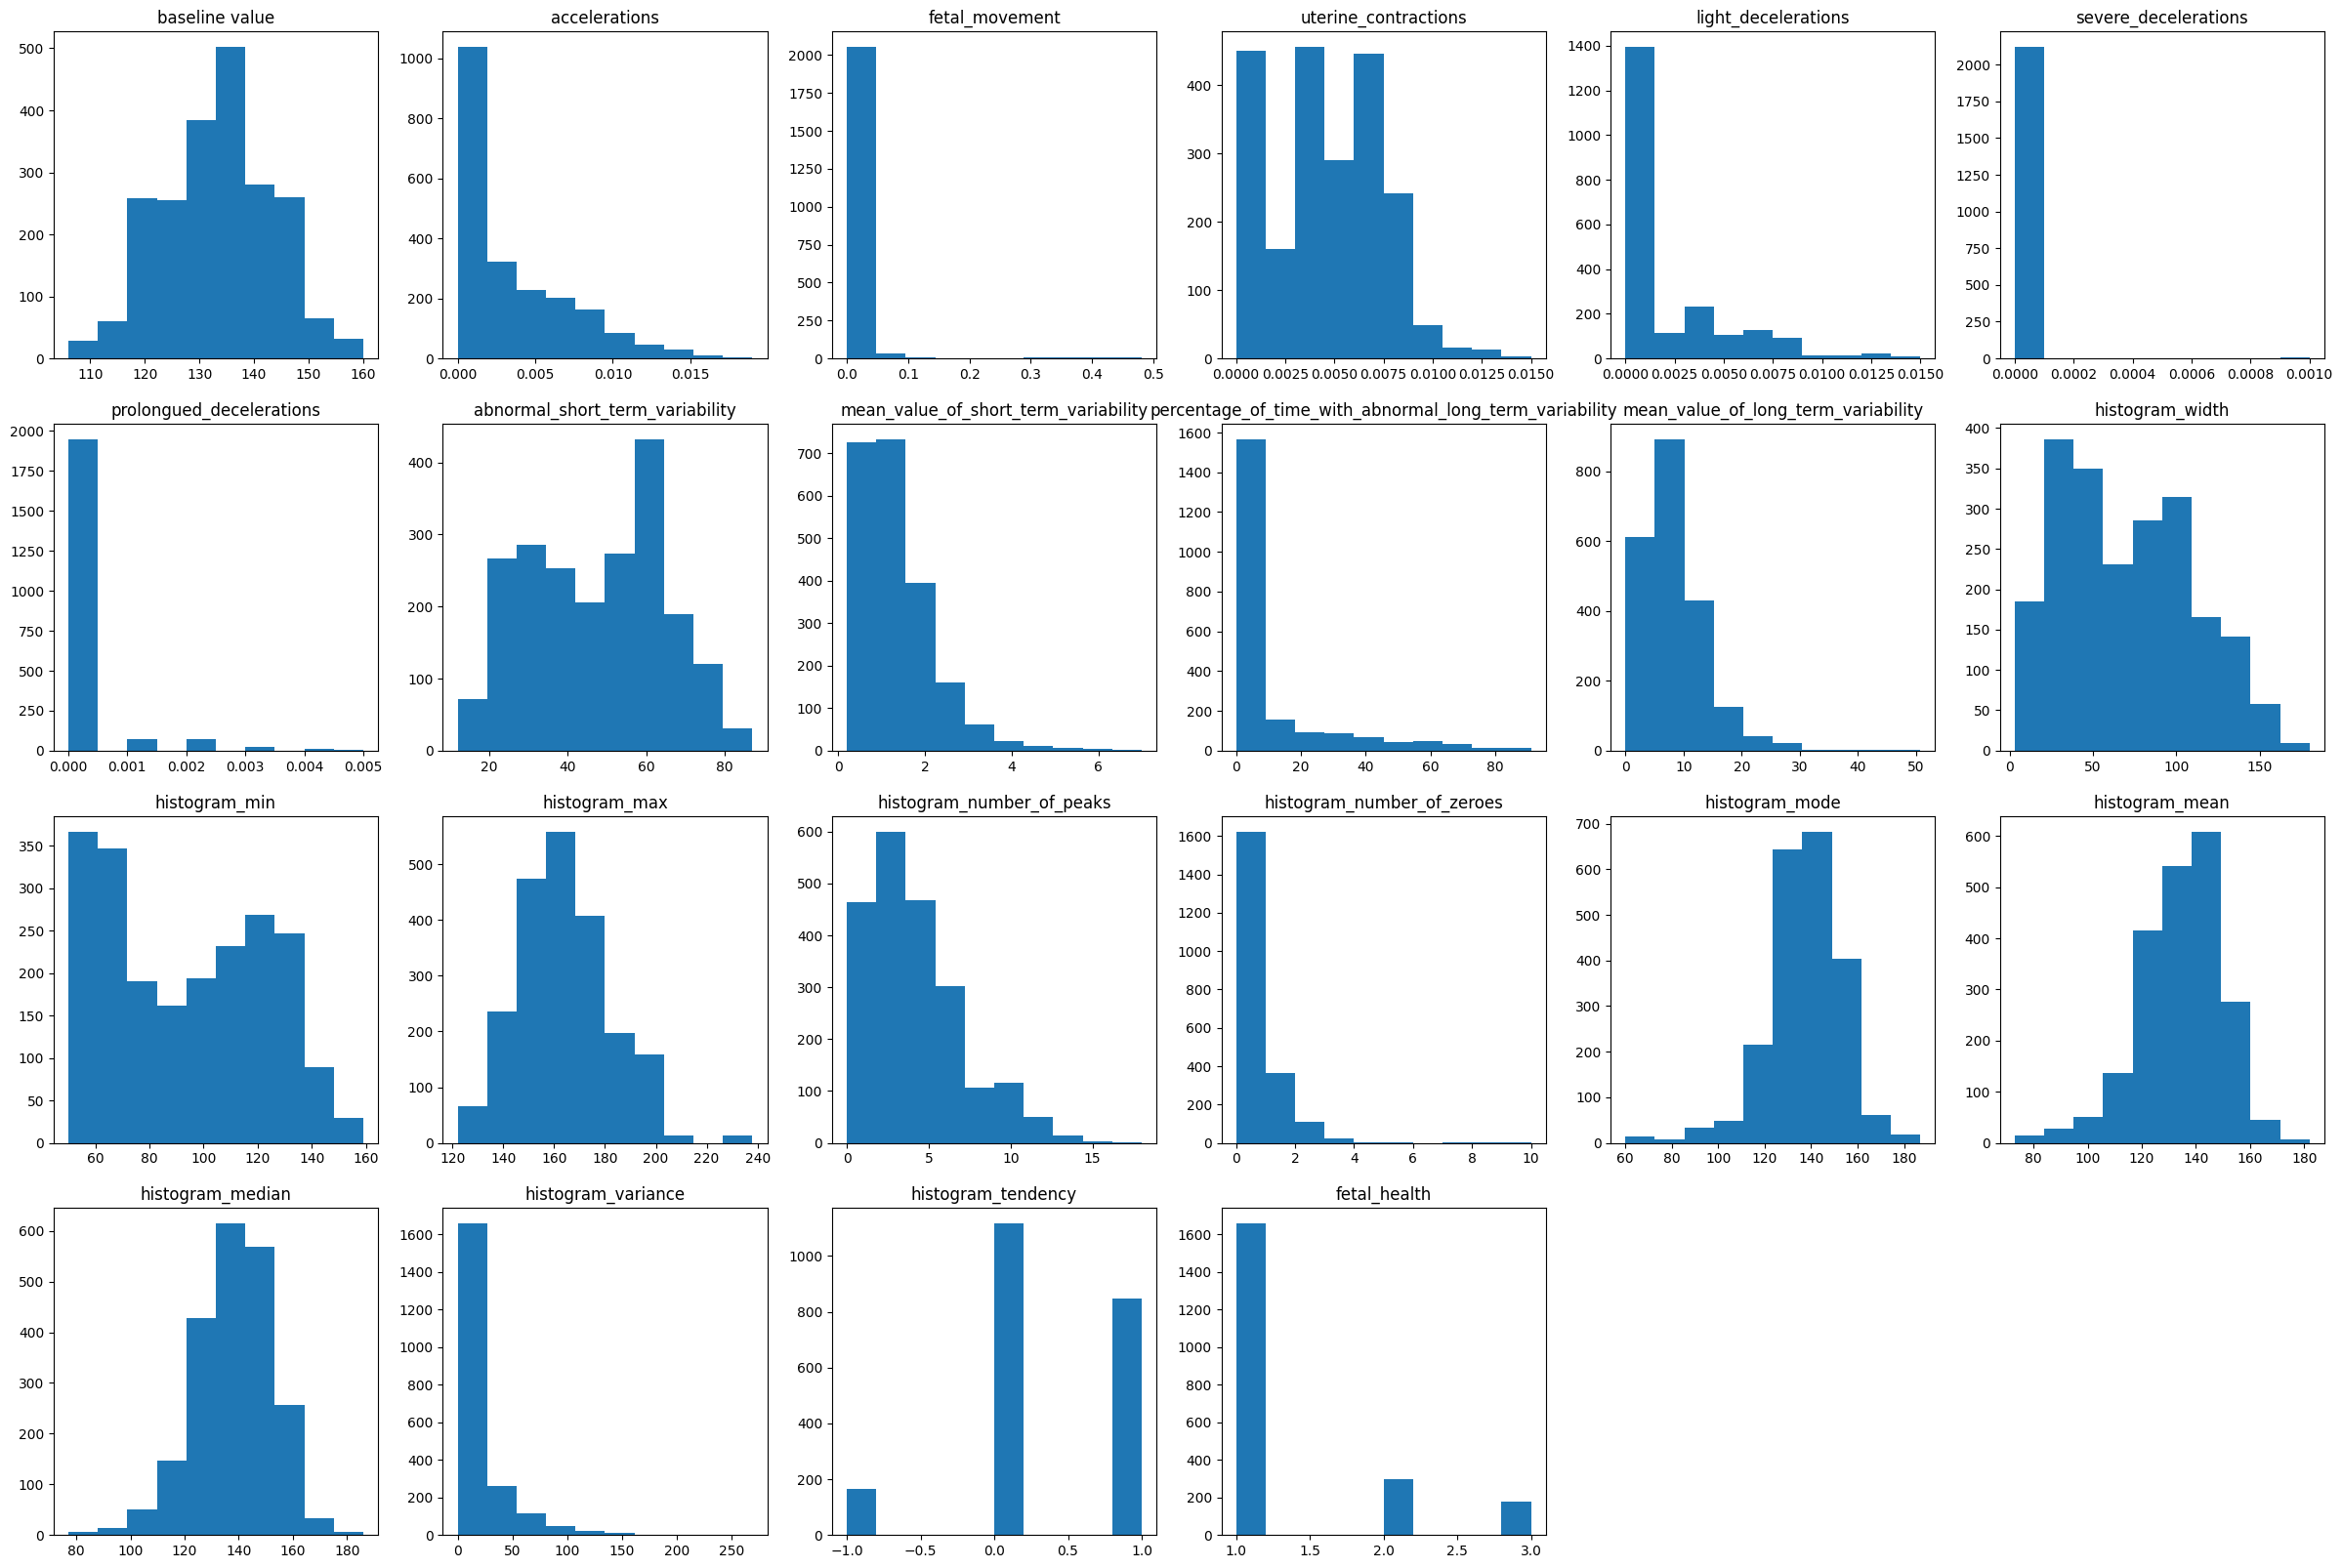

In [6]:
# 변수 별 히스토그램
fig = plt.figure()
fig.set_size_inches(30,20)
for i in range(0,df.shape[1]):
  ax = fig.add_subplot(4, 6, i+1)
  clm = df.columns[i]
  ax.hist(df[clm])
  ax.set_title(clm)
plt.show()

## 2개의 변수를 이용하여 kNN 적용해보기

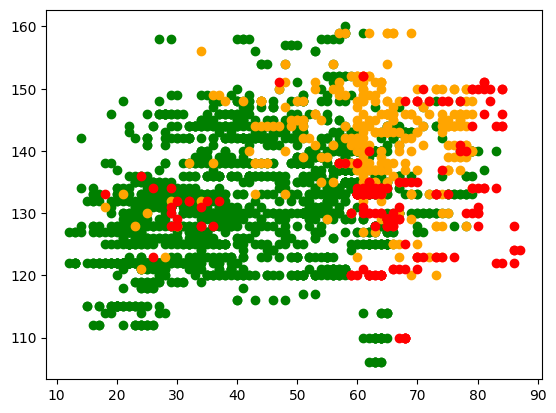

In [7]:
# Y(fetal_health)에 대한 산점도 살펴보기
plt.scatter(x=df[df['fetal_health']==1.0]['abnormal_short_term_variability'], y=df[df['fetal_health']==1.0]['baseline value'], c='green')
plt.scatter(x=df[df['fetal_health']==2.0]['abnormal_short_term_variability'], y=df[df['fetal_health']==2.0]['baseline value'], c='orange')
plt.scatter(x=df[df['fetal_health']==3.0]['abnormal_short_term_variability'], y=df[df['fetal_health']==3.0]['baseline value'], c='red')
plt.show()

In [8]:
# dataset 구성
x_data = df[['abnormal_short_term_variability', 'baseline value']]
y_data = df[['fetal_health']]

ratio = 1/10
idx = int(x_data.shape[0]*(1-ratio))

x_train = x_data.iloc[:idx]
x_test  = x_data.iloc[idx:]
y_train = y_data.iloc[:idx]
y_test  = y_data.iloc[idx:]

print('x_train:', x_train.shape, '\ty_train:', y_train.shape)
print('x_test:', x_test.shape, '\ty_test:', y_test.shape)

x_train: (1913, 2) 	y_train: (1913, 1)
x_test: (213, 2) 	y_test: (213, 1)


In [9]:
# kNN model train, test
from sklearn.neighbors import KNeighborsClassifier as knn

model = knn(n_neighbors=5)
# model = knn(n_neighbors=9)
# model = knn(n_neighbors=5, metric='euclidean')
# model = knn(n_neighbors=5, metric='manhattan')
model.fit(x_train, y_train)
pred = model.predict(x_test)

gt = np.array(y_test)[:,0]
print('Accuracy\t:', sum(gt == pred), '/', pred.shape[0], ',', np.round(sum(gt == pred)/pred.shape[0]*100,2), '%')

Accuracy	: 65 / 213 , 30.52 %


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 모든 변수 이용

In [10]:
# dataset 다시 구성
x_data = df.drop(columns=['fetal_health'])
y_data = df[['fetal_health']]

ratio = 1/10
idx = int(x_data.shape[0]*(1-ratio))

x_train = x_data.iloc[:idx]
x_test  = x_data.iloc[idx:]
y_train = y_data.iloc[:idx]
y_test  = y_data.iloc[idx:]

print('x_train:', x_train.shape, '\tx_test:', x_test.shape)
print('y_train:', y_train.shape, '\ty_test:', y_test.shape)

x_train: (1913, 21) 	x_test: (213, 21)
y_train: (1913, 1) 	y_test: (213, 1)


In [11]:
# kNN model train, test
from sklearn.neighbors import KNeighborsClassifier as knn

model = knn(n_neighbors=9, metric='manhattan')
model.fit(x_train, y_train)
pred = model.predict(x_test)

gt = np.array(y_test)[:,0]
print('Result\t:', sum(gt == pred), '/', pred.shape[0], ',', np.round(sum(gt == pred)/pred.shape[0]*100,2), '%')

Result	: 168 / 213 , 78.87 %


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Image 데이터에 적용해보기

In [12]:
# MNIST datset http://yann.lecun.com/exdb/mnist/
from keras.datasets import mnist

In [13]:
# import data
((x_train, y_train), (x_test, y_test)) = mnist.load_data()
print('x_train:', x_train.shape, '\tx_test:', x_test.shape)
print('y_train:', y_train.shape, '\t\ty_test:', y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28) 	x_test: (10000, 28, 28)
y_train: (60000,) 		y_test: (10000,)


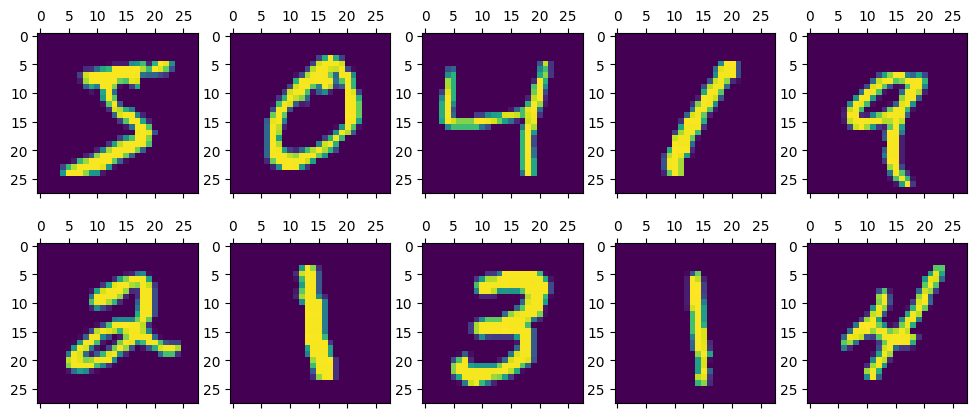

In [14]:
# data sample
fig = plt.figure()
fig.set_size_inches(12,5)
for i in range(0,10):
  ax = fig.add_subplot(2, 5, i+1)
  ax.matshow(x_train[i])
plt.show()

In [15]:
# flatten image data(2-D) to array(1-D)
x_train = x_train.reshape(-1,28*28)
x_test  = x_test.reshape(-1,28*28)

# reduce data size (memory problem)
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test  = x_test[1000:1100]
y_test  = y_test[1000:1100]

print('x_train:', x_train.shape, '\ty_train:', y_train.shape)
print('x_test:', x_test.shape, '\ty_test:', y_test.shape)

x_train: (1000, 784) 	y_train: (1000,)
x_test: (100, 784) 	y_test: (100,)


In [16]:
# model train, test
model = knn(n_neighbors=5)
model.fit(x_train, y_train)
pred = model.predict(x_test)

gt = y_test
print('Result\t:', sum(gt == pred), '/', pred.shape[0], ',', np.round(sum(gt == pred)/pred.shape[0]*100,2), '%')

Result	: 85 / 100 , 85.0 %
